<a href="https://colab.research.google.com/github/ParkHyunsu1110/Machine-Learning/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import 목록

In [1]:
%matplotlib inline
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

그래프 그리는 함수

In [2]:
def plot_decision_regions(
    X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

파일 추가

In [3]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


레이블과 특성 나누기

In [4]:
iris = pd.read_csv("iris.csv", header=None)
iris #기본 데이터프레임

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] #칼럼 명이 숫자로 되어 있기 때문에 칼럼 명을 지정해 줌
X = iris.drop('species', axis=1).to_numpy() #DataFrame은 2차원 배열이기 때문에 1차원으로 변경해줌
label = iris['species'].to_numpy() #DataFrame은 2차원 배열이기 때문에 1차원으로 변경해줌
X = X[:, [2, 3]]
y = np.where(label == 'Iris-setosa', 0, np.where(label == 'Iris-versicolor', 1, 2)) #레이블에 대하여 인코딩
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris #칼럼 명이 변경된 데이터프레임 

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


데이터 셋 분할하기

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #특성데이터, 결과데이터
    train_size=0.7, #학습 데이터의 비율
    random_state=1, #random 시드 값
    stratify=y) #계층화 기능

데이터 시각화
* x축: 꽃잎의 길이
* y축: 꽃잎의 너비
* 각 점의 색깔을 품종마다 다르게 표시함
* 훈련용 데이터

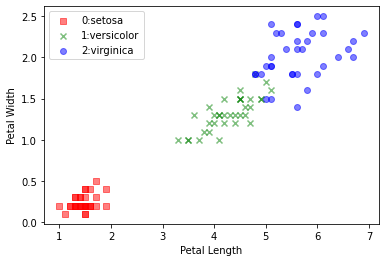

In [8]:
ax = plt.axes()
markers = ['s', 'x', 'o'] #각 품종의 마크
colors = ['r', 'g', 'b'] #각 품종의 색상
labels = ['0:setosa', '1:versicolor', '2:virginica'] #각 품종 라벨링
for i in range(3): #반복문으로 산점도 표시
    X_sub = X_train[y_train==i]
    ax.scatter(X_sub[:, 0], X_sub[:, 1], alpha=0.5, marker=markers[i], c=colors[i], label=labels[i])
    ax.set(xlabel='Petal Length', ylabel='Petal Width')
    ax.legend()

데이터 표준화

In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #X_train의 각 특성마다 샘플평균과 표준편차를 계산하고, X_train 값을 표준화
X_test_std = sc.transform(X_test) #X_test값을 표준화

Logistic Regression 알고리즘

In [10]:
#모델 생성 및 학습
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)

LogisticRegression()

In [11]:
logistic.predict(X_train_std) #훈련 데이터 셋으로 예측

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0])

In [12]:
logistic.predict(X_test_std) #테스트 데이터 셋으로 예측

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [13]:
logistic.score(X_train_std, y_train) #훈련 데이터 셋 정확도

0.9428571428571428

In [14]:
logistic.score(X_test_std, y_test) #테스트 데이터 셋 정확도

0.9777777777777777

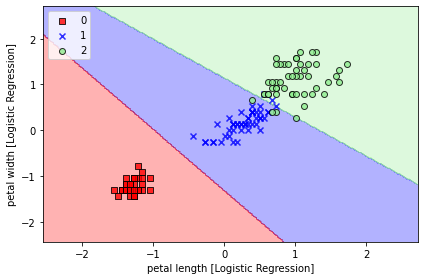

In [39]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=logistic, test_idx=range(0, 0))
plt.xlabel('petal length [Logistic Regression]')
plt.ylabel('petal width [Logistic Regression]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

SVM 알고리즘

선형 SVC

In [16]:
#모델 생성 및 학습
svc_linear = SVC(kernel='linear', C=1.0, random_state=1)
svc_linear.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [17]:
svc_linear.predict(X_train_std) #훈련 데이터 셋으로 예측

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0])

In [18]:
svc_linear.predict(X_test_std) #테스트 데이터 셋으로 예측

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [19]:
svc_linear.score(X_train_std, y_train) #훈련 데이터 셋 정확도

0.9523809523809523

In [20]:
svc_linear.score(X_test_std, y_test) #테스트 데이터 셋 정확도

0.9777777777777777

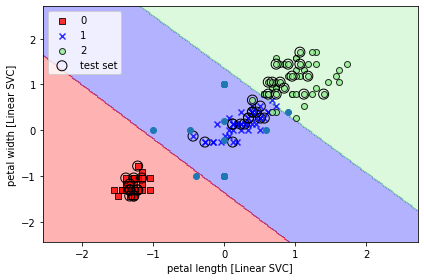

In [37]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svc_linear, test_idx=range(105, 150))
plt.scatter(svc_linear.dual_coef_[0, :], svc_linear.dual_coef_[1, :])
plt.xlabel('petal length [Linear SVC]')
plt.ylabel('petal width [Linear SVC]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

비선형 SVC

In [22]:
#모델 생성 및 학습
svc_rbf = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1) #커널 기법, 실제로 데이터를 확장하지 않고 확장된 특성에 대한 내적을 이용함.
svc_rbf.fit(X_train_std, y_train)

SVC(gamma=0.2, random_state=1)

In [23]:
svc_rbf.predict(X_train_std) #훈련 데이터 셋으로 예측

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0])

In [24]:
svc_rbf.predict(X_test_std) #테스트 데이터 셋으로 예측

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [25]:
svc_rbf.score(X_train_std, y_train) #훈련 데이터 셋 정확도

0.9523809523809523

In [26]:
svc_rbf.score(X_test_std, y_test) #테스트 데이터 셋 정확도

0.9777777777777777

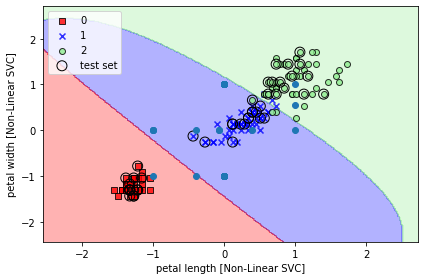

In [36]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svc_rbf, test_idx=range(105, 150))
plt.scatter(svc_rbf.dual_coef_[0,:], svc_rbf.dual_coef_[1,:])
plt.xlabel('petal length [Non-Linear SVC]')
plt.ylabel('petal width [Non-Linear SVC]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Tree 알고리즘

In [28]:
#모델 생성 및 학습
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [29]:
tree.predict(X_train) #훈련 데이터 셋 예측

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0])

In [30]:
tree.predict(X_test) #테스트 데이터 셋 예측

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [31]:
tree.score(X_train, y_train) #훈련 데이터 셋 정확도

0.9714285714285714

In [32]:
tree.score(X_test, y_test) #테스트 데이터 셋 정확도

0.9777777777777777

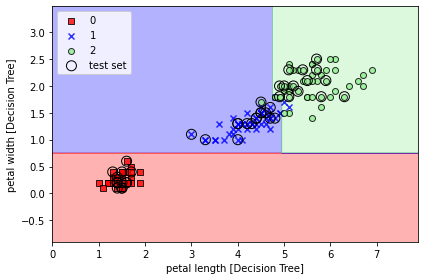

In [35]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [Decision Tree]')
plt.ylabel('petal width [Decision Tree]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

[Text(111.6, 391.392, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(55.8, 304.416, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.39999999999998, 304.416, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(111.6, 217.44, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.2, 217.44, 'X[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(111.6, 130.464, 'X[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(55.8, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.39999999999998, 43.488, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(334.79999999999995, 130.464, 'X[0] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(279.0, 43.488, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(390.59999999999997, 43.488, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

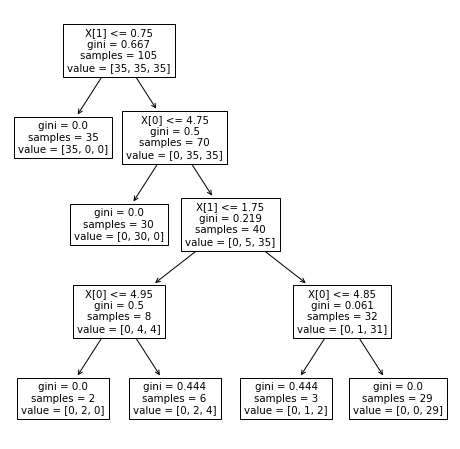

In [34]:
plt.figure(figsize=(8,8))
plot_tree(tree)